<a href="https://colab.research.google.com/github/timmtimm1/Projects-/blob/main/RandomForestWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.nunique().sort_values(ascending=False)

Date             3436
Rainfall          681
Pressure3pm       549
Pressure9am       546
MaxTemp           505
Temp3pm           502
Temp9am           441
MinTemp           389
Evaporation       358
Sunshine          145
Humidity9am       101
Humidity3pm       101
WindGustSpeed      67
Location           49
WindSpeed3pm       44
WindSpeed9am       43
WindDir3pm         16
WindDir9am         16
WindGustDir        16
Cloud9am           10
Cloud3pm           10
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['RainTomorrow']=df['RainTomorrow'].map({'Yes':1, 'No':0})

In [ ]:
df['RainToday']=df['RainToday'].map({'Yes':1, 'No':0})

In [ ]:
df[df['RainTomorrow'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,0.0,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,0.0,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,0.0,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,0.0,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,2016-02-07,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,0.0,NaN
145091,2016-06-22,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,0.0,NaN
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,0.0,NaN


In [ ]:
df=df[df['RainTomorrow'].notnull()]

In [ ]:
df=df[df['RainToday'].notnull()]

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         66805
Evaporation      59694
Cloud3pm         56094
Cloud9am         52625
Pressure3pm      13769
Pressure9am      13743
WindDir9am        9660
WindGustDir       9163
WindGustSpeed     9105
WindDir3pm        3670
Humidity3pm       3501
Temp3pm           2624
WindSpeed3pm      2531
Humidity9am       1517
WindSpeed9am      1055
Temp9am            656
MinTemp            468
MaxTemp            307
RainToday            0
Date                 0
Location             0
Rainfall             0
RainTomorrow         0
dtype: int64

In [ ]:
df.shape

(140787, 23)

In [ ]:
df[df.isnull().sum(axis=1)> 5 ]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64,2009-02-03,Albury,21.5,37.7,0.0,NaN,NaN,NaN,NaN,N,...,51.0,21.0,1009.2,1005.7,NaN,NaN,27.2,36.2,0.0,0.0
65,2009-02-04,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,...,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,0.0,0.0
89,2009-02-28,Albury,16.0,34.5,0.0,NaN,NaN,WSW,44.0,E,...,44.0,14.0,1007.5,1004.6,NaN,NaN,22.2,33.6,0.0,0.0
291,2009-09-18,Albury,7.4,20.4,10.2,NaN,NaN,WNW,46.0,NaN,...,75.0,54.0,1021.2,1018.6,NaN,NaN,12.9,20.3,1.0,0.0
458,2010-03-04,Albury,15.1,NaN,0.0,NaN,NaN,NaN,NaN,SE,...,70.0,35.0,1014.2,1009.8,NaN,NaN,20.1,28.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145086,2016-06-17,Uluru,8.2,21.9,0.0,NaN,NaN,NaN,NaN,NaN,...,79.0,40.0,1016.9,1013.3,NaN,NaN,11.5,20.9,0.0,0.0
145087,2016-06-18,Uluru,8.7,18.9,0.0,NaN,NaN,NaN,NaN,NaN,...,80.0,46.0,1019.7,1016.8,1.0,3.0,12.3,17.9,0.0,0.0
145088,2016-06-19,Uluru,3.4,18.3,0.0,NaN,NaN,NaN,NaN,NaN,...,77.0,40.0,1020.3,1017.3,NaN,NaN,8.2,16.9,0.0,0.0
145089,2016-06-20,Uluru,2.2,21.5,0.0,NaN,NaN,NaN,NaN,NaN,...,80.0,23.0,1017.4,1014.1,NaN,NaN,8.5,20.5,0.0,0.0


In [ ]:
df = df[df.isnull().sum(axis=1)< 6 ]

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         52761
Evaporation      46118
Cloud3pm         43972
Cloud9am         41873
WindDir9am        6612
WindGustDir       4368
WindGustSpeed     4346
Humidity3pm       1168
Pressure9am       1028
Pressure3pm        971
Temp3pm            702
WindDir3pm         611
Humidity9am        532
Temp9am             98
MinTemp             88
WindSpeed9am        80
MaxTemp             57
WindSpeed3pm        49
RainToday            0
Date                 0
Location             0
Rainfall             0
RainTomorrow         0
dtype: int64

In [ ]:
cols = [
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Humidity9am',
    'Humidity3pm',
    'Temp9am',
    'Temp3pm'
]

In [ ]:
for col in cols:
  df[col] = df[col].fillna(df[col].mean())


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126371 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           126371 non-null  object 
 1   Location       126371 non-null  object 
 2   MinTemp        126371 non-null  float64
 3   MaxTemp        126371 non-null  float64
 4   Rainfall       126371 non-null  float64
 5   Evaporation    126371 non-null  float64
 6   Sunshine       126371 non-null  float64
 7   WindGustDir    122003 non-null  object 
 8   WindGustSpeed  126371 non-null  float64
 9   WindDir9am     119759 non-null  object 
 10  WindDir3pm     125760 non-null  object 
 11  WindSpeed9am   126371 non-null  float64
 12  WindSpeed3pm   126371 non-null  float64
 13  Humidity9am    126371 non-null  float64
 14  Humidity3pm    126371 non-null  float64
 15  Pressure9am    126371 non-null  float64
 16  Pressure3pm    126371 non-null  float64
 17  Cloud9am       126371 non-null  fl

In [ ]:
df['WindDir9am'].mode()[0]

'N'

In [ ]:
cat_cols = [
    'WindGustDir',
    'WindDir9am',
    'WindDir3pm',
]

In [ ]:
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126371 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           126371 non-null  object 
 1   Location       126371 non-null  object 
 2   MinTemp        126371 non-null  float64
 3   MaxTemp        126371 non-null  float64
 4   Rainfall       126371 non-null  float64
 5   Evaporation    126371 non-null  float64
 6   Sunshine       126371 non-null  float64
 7   WindGustDir    126371 non-null  object 
 8   WindGustSpeed  126371 non-null  float64
 9   WindDir9am     126371 non-null  object 
 10  WindDir3pm     126371 non-null  object 
 11  WindSpeed9am   126371 non-null  float64
 12  WindSpeed3pm   126371 non-null  float64
 13  Humidity9am    126371 non-null  float64
 14  Humidity3pm    126371 non-null  float64
 15  Pressure9am    126371 non-null  float64
 16  Pressure3pm    126371 non-null  float64
 17  Cloud9am       126371 non-null  fl

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Year']=df['Date'].dt.year

In [ ]:
df['Month']=df['Date'].dt.month

In [ ]:
df['Day']=df['Date'].dt.day

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.471408,7.634623,W,44.0,W,WNW,...,1007.1,8.000000,4.503441,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,5.471408,7.634623,WNW,44.0,NNW,WSW,...,1007.8,4.434389,4.503441,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,5.471408,7.634623,WSW,46.0,W,WSW,...,1008.7,4.434389,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,5.471408,7.634623,NE,24.0,SE,E,...,1012.8,4.434389,4.503441,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,5.471408,7.634623,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5


# Part 2

In [ ]:
dummy_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Year','Month','Day']

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,13.4,22.9,0.6,5.471408,7.634623,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,False,False
1,7.4,25.1,0.0,5.471408,7.634623,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,12.9,25.7,0.0,5.471408,7.634623,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,False
3,9.2,28.0,0.0,5.471408,7.634623,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,5.471408,7.634623,41.0,7.0,20.0,82.0,33.0,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='RainTomorrow', ylabel='count'>

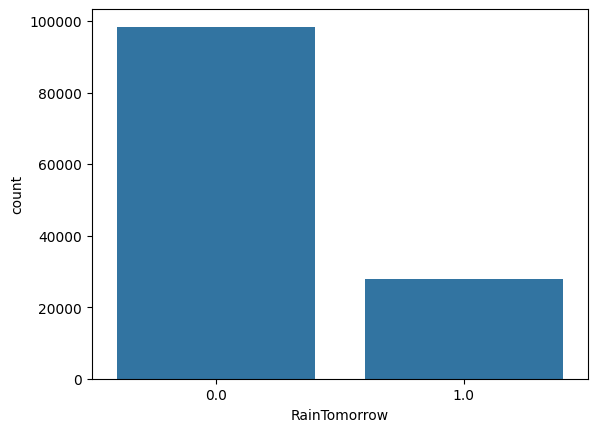

In [ ]:
sns.countplot(x='RainTomorrow',data=df)

In [ ]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(train_x,train_y)

RandomForestClassifier()

In [ ]:
predicition = model.predict(test_x)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_y,predicition))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     19554
         1.0       0.79      0.50      0.62      5721

    accuracy                           0.86     25275
   macro avg       0.83      0.73      0.76     25275
weighted avg       0.85      0.86      0.85     25275



In [ ]:
print('Test Score:',model.score(test_x,test_y))
print('Test Score:', model.score(train_x,train_y))

Test Score: 0.8571315529179031
Test Score: 0.9999703252354198


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')

In [ ]:
x_train_sm, y_train_sm =smote.fit_resample(train_x,train_y)

In [ ]:
y_train_sm.value_counts()

RainTomorrow
1.0    78844
0.0    78844
Name: count, dtype: int64

In [ ]:
model.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [ ]:
predict = model.predict(test_x)

In [ ]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91     19554
         1.0       0.70      0.63      0.66      5721

    accuracy                           0.85     25275
   macro avg       0.80      0.77      0.78     25275
weighted avg       0.85      0.85      0.85     25275

